In [ ]:
!pip install sounddevice

In [ ]:
pip install numpy scipy matplotlib

In [43]:
import time
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio, display

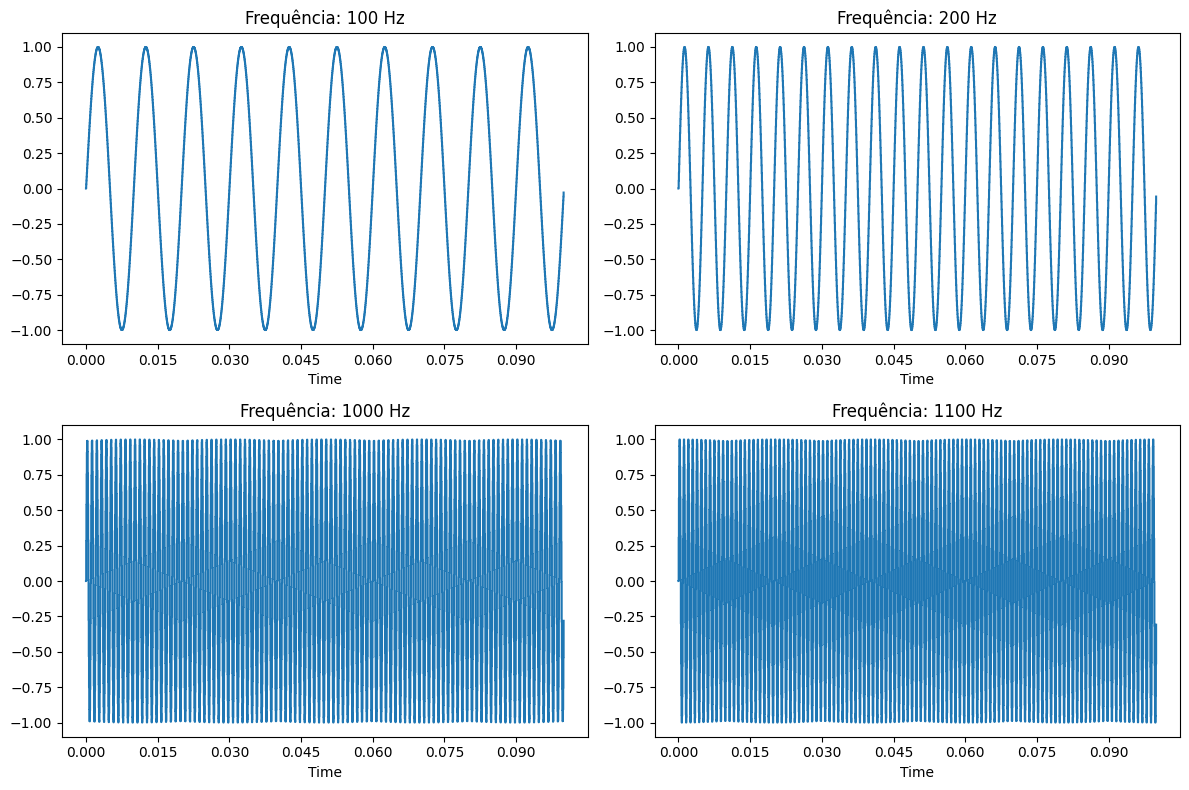

In [44]:
def generate_sound(frequency, duration, sample_rate=22050):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    waveform = np.sin(2 * np.pi * frequency * t)
    return waveform

# Frequências desejadas (Hz)
frequencies = [100, 200, 1000, 1100]

# Duração de cada som (segundos)
duration = 0.1


# Gera os sons
sounds = [generate_sound(freq, duration) for freq in frequencies]

# Visualiza as formas de onda usando Librosa
plt.figure(figsize=(12, 8))
for i, sound in enumerate(sounds):
    plt.subplot(2, 2, i + 1)
    librosa.display.waveshow(sound, sr=22050)
    plt.title(f"Frequência: {frequencies[i]} Hz")
plt.tight_layout()
plt.show()

In [45]:
def generate_sound(frequency, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    waveform = np.sin(2 * np.pi * frequency * t)
    return waveform

# Frequências desejadas (Hz)
frequencies = [100, 200, 1000, 1100]

# Duração de cada som (segundos)
duration = 2.0

# Reproduzir os sons e anotar as diferenças
print("Escolha dentre os quatro sons.")
print("Pressione Enter após ouvir cada som.")

for i, freq in enumerate(frequencies):
    sound = generate_sound(freq, duration)
    print(f"Reproduzindo som {i + 1} - Frequência: {freq} Hz")
    display(Audio(data=sound, rate=44100))

    # Esperar até que o áudio termine de tocar antes de prosseguir
    time.sleep(duration)

    input("Pressione Enter para continuar...")

print("Fim da reprodução.")


Escolha dentre os quatro sons.
Pressione Enter após ouvir cada som.
Reproduzindo som 1 - Frequência: 100 Hz


Pressione Enter para continuar...
Reproduzindo som 2 - Frequência: 200 Hz


Pressione Enter para continuar...
Reproduzindo som 3 - Frequência: 1000 Hz


Pressione Enter para continuar...
Reproduzindo som 4 - Frequência: 1100 Hz


Pressione Enter para continuar...
Fim da reprodução.


A diferença entre duas frequências está relacionada à percepção auditiva do ouvinte.

###Diferença entre 100Hz e 200Hz:
A diferença entre 100Hz e 200Hz é de 100Hz. Para a maioria das pessoas, essa diferença é facilmente perceptível. A percepção de frequências mais baixas é fundamental para a sensação de "graves" e "profundidade" em um som. Portanto, você notará que 200Hz soa mais grave e mais "profundo" do que 100Hz.

###Diferença entre 1000Hz e 1100Hz:
A diferença entre 1000Hz e 1100Hz é de 100Hz. Essa diferença de frequência também é facilmente perceptível. No entanto, a percepção auditiva nessa faixa de frequência está associada a sons mais "agudo" ou "agudos". Portanto, você notará que 1100Hz soa mais "agudo" do que 1000Hz.

Em resumo, a percepção das diferenças entre 100Hz e 200Hz e entre 1000Hz e 1100Hz é geralmente fácil e pode ser distinguida pelo ouvido humano. Essas diferenças são importantes para a nossa apreciação e compreensão da música e do som em geral. É importante notar que a capacidade de perceber essas diferenças pode variar de pessoa para pessoa e também depende das condições de audição e da qualidade dos dispositivos de áudio utilizados.

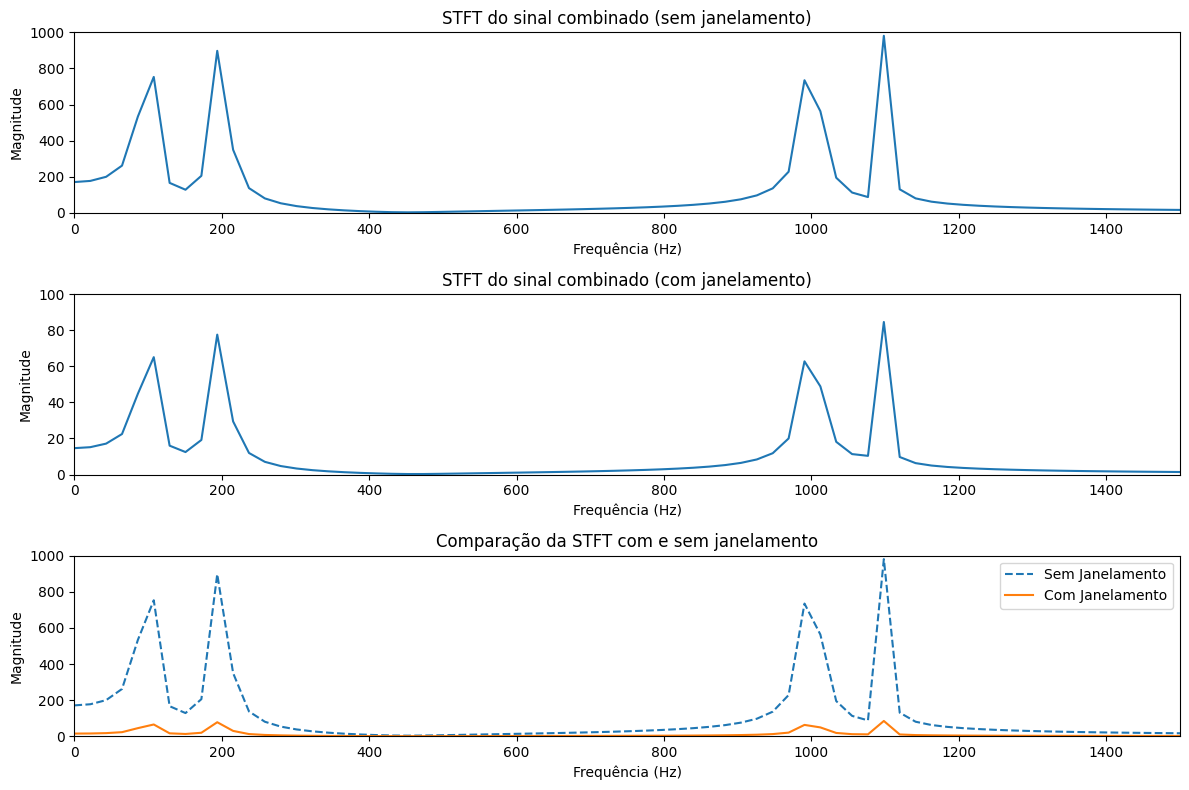

In [50]:
def generate_combined_signal(frequencies, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    combined_waveform = np.sum([np.sin(2 * np.pi * freq * t) for freq in frequencies], axis=0)
    return combined_waveform

# Frequências desejadas (Hz)
frequencies = [100, 200, 1000, 1100]

# Duração do sinal combinado (segundos)
duration = 1.0

# Gera o sinal combinado das 4 frequências
combined_signal = generate_combined_signal(frequencies, duration)

# Aplica a janela para melhor visualização da STFT
window = signal.windows.hamming(len(combined_signal))
windowed_signal = combined_signal * window

# Parâmetros para a STFT
n_fft = 2048
hop_length = 512

# Calcula a STFT com e sem janelamento
stft_without_window = np.abs(np.fft.rfft(combined_signal, n=n_fft))
stft_with_window = np.abs(np.fft.rfft(windowed_signal, n=n_fft))

# Frequências correspondentes à STFT
freqs = np.fft.rfftfreq(n_fft, d=1.0/44100)

# Plota a STFT sem janelamento
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(freqs, stft_without_window)
plt.ylim(0, 1000)  # Define o limite máximo do eixo y
plt.xlim(0, 1500)  # Define o limite máximo do eixo x
plt.title("STFT do sinal combinado (sem janelamento)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

# Plota a STFT com janelamento
plt.subplot(3, 1, 2)
plt.plot(freqs, stft_with_window)
plt.ylim(0, 100)  # Define o limite máximo do eixo y
plt.xlim(0, 1500)  # Define o limite máximo do eixo x
plt.title("STFT do sinal combinado (com janelamento)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

# Plota a comparação entre as STFTs com e sem janelamento
plt.subplot(3, 1, 3)
plt.plot(freqs, stft_without_window, label='Sem Janelamento', linestyle='dashed')
plt.plot(freqs, stft_with_window, label='Com Janelamento', linestyle='solid')
plt.ylim(0, 1000)  # Define o limite máximo do eixo y
plt.xlim(0, 1500)  # Define o limite máximo do eixo x
plt.title("Comparação da STFT com e sem janelamento")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


Reproduzindo áudio - 30 Piano


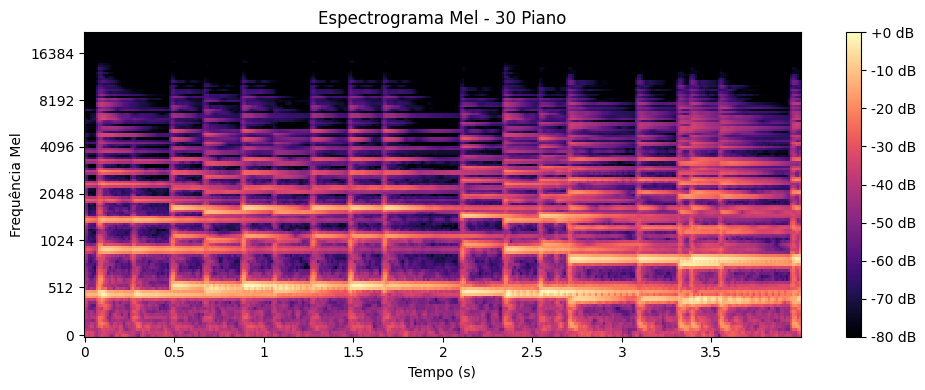

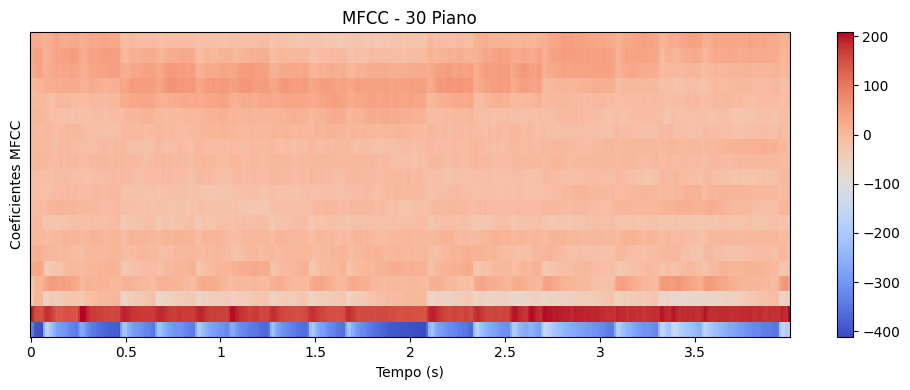

Reproduzindo áudio - 30 String


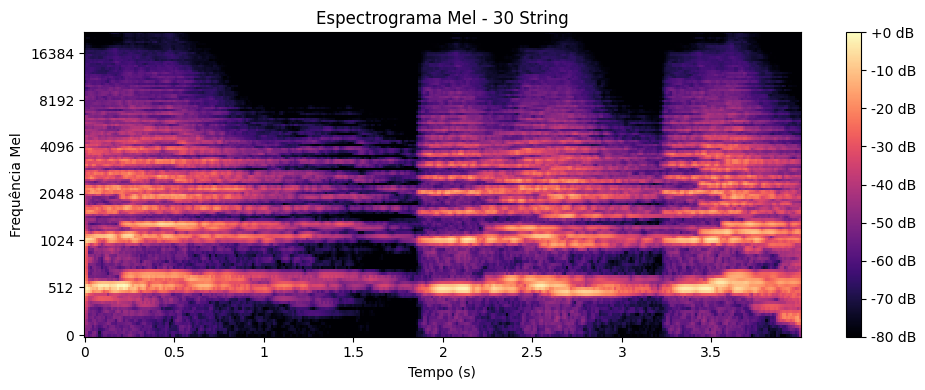

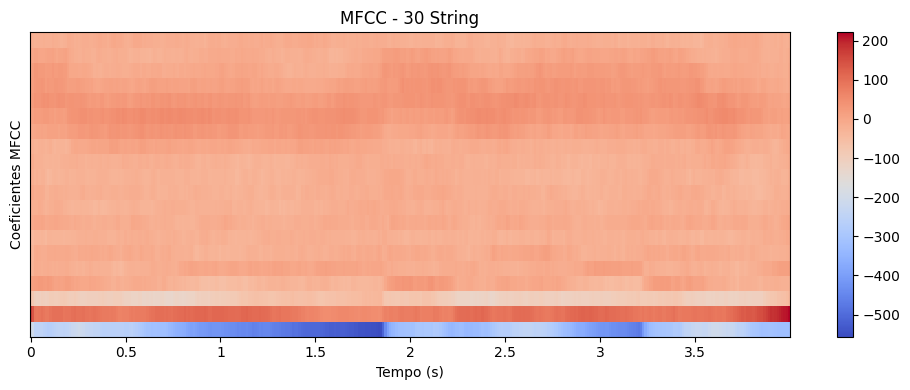

Reproduzindo áudio - 30 Electric Guitar


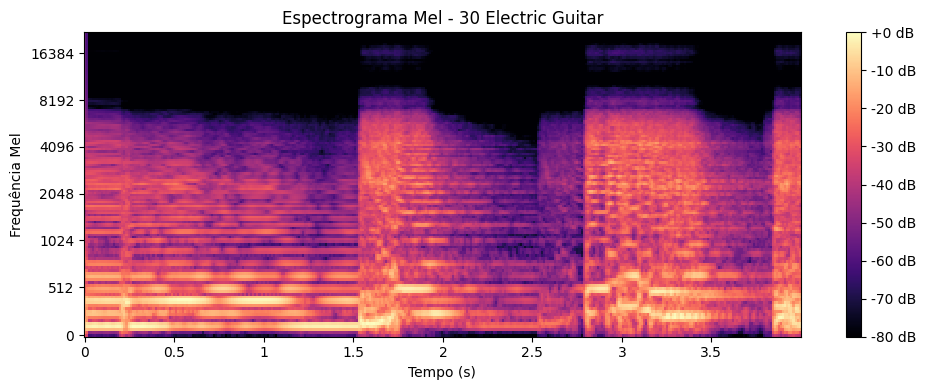

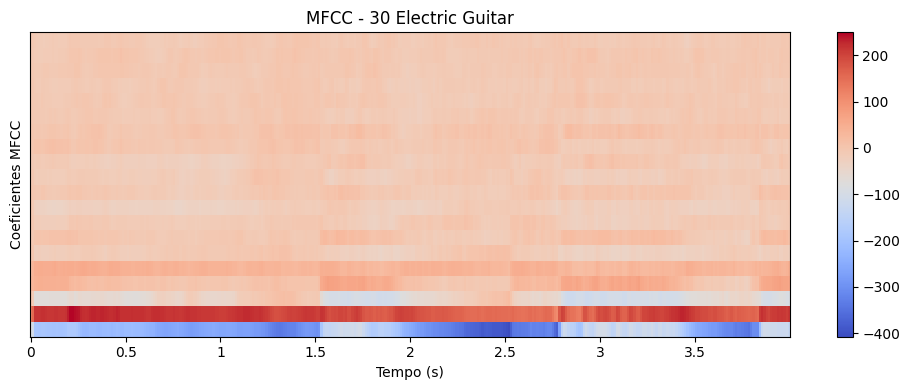

In [51]:
# Função para converter frequência em Hz para a escala Mel
def hz_to_mel(frequency):
    return 2595 * np.log10(1 + frequency / 700)

# Caminho para os arquivos de áudio
file_paths = ["30Piano.wav", "30String.wav", "30Electric_Guitar.wav"]
titles = ["30 Piano", "30 String", "30 Electric Guitar"]

# Loop para processar cada sinal
for file_path, title in zip(file_paths, titles):
    # Carregar o sinal de áudio usando a biblioteca librosa e audioread
    audio, sr = librosa.load(file_path, sr=None, res_type='kaiser_fast')

    # Reproduzir o áudio
    print(f"Reproduzindo áudio - {title}")
    display(Audio(data=audio, rate=sr))

    # Calcular e plotar o espectrograma Mel
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Espectrograma Mel - {title}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência Mel')
    plt.tight_layout()
    plt.show()

    # Calcular e plotar o MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f'MFCC - {title}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Coeficientes MFCC')
    plt.tight_layout()
    plt.show()
